In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors

import seaborn as sns
import pickle
from gryffin import Gryffin
from chimera import Chimera

#import rdkit
#import rdkit.Chem as chem
#import rdkit.Chem.AllChem as allchem

sns.set(style='ticks', context='notebook', font_scale=1.2)

chimera = Chimera(
       tolerances=[25.0, 2.0, 0.0], 
       absolutes=[True, True, False], 
       goals=['min', 'min', 'min'],
)
RA_CUTOFF = 0.9
RA_TYPE = 'ra_nn'


## Load in the tabulated search space

In [2]:
# load in the tabular results
df_results = pd.read_csv('data/df_results.csv')
# apply RA cutoff
df_results = df_results[df_results[RA_TYPE]>=RA_CUTOFF]
print(f'\n>>> USING {RA_TYPE} CUTOFF AT {RA_CUTOFF} : {df_results.shape}\n')



>>> USING ra_nn CUTOFF AT 0.9 : (959, 2394)



In [3]:
scalarized = chimera.scalarize(df_results.loc[:, ['abs_lam_diff', 'ered', 'gsol']])
df_results['merit'] = scalarized
df_results.head()

,Unnamed: 0,product_smiles,r1_label,r1_smiles,r1_smiles_raw,r3_label,r3_smiles,r3_smiles_raw,r4_label,r4_smiles,...,r5_MW,r5_AMW,r5_WPath,r5_WPol,r5_Zagreb1,r5_Zagreb2,r5_mZagreb2,r5_type,r5_ix,merit
0,0,CCOCN(C(C)=O)c1c(C)c(C)c(C)c2nsnc12,R1_0,CCOC,CCOC,R3_0,C,C,R4_0,C,...,16.031300,3.206260,0,0,0.0,0.0,0.0,R5,0,0.697622
1,1,CCOCN(C(C)=O)c1c(C)c(C)c(C(F)(F)F)c2nsnc12,R1_0,CCOC,CCOC,R3_0,C,C,R4_0,C,...,70.003035,14.000607,9,0,12.0,9.0,1.0,R5,1,0.797512
2,2,CCOCN(C(C)=O)c1c(C)c(C)c(C#N)c2nsnc12,R1_0,CCOC,CCOC,R3_0,C,C,R4_0,C,...,27.010899,9.003633,1,0,2.0,1.0,1.0,R5,2,0.746816
3,3,CCOCN(C(C)=O)c1c(C)c(C)c(OC)c2nsnc12,R1_0,CCOC,CCOC,R3_0,C,C,R4_0,C,...,32.026215,5.337702,1,0,2.0,1.0,1.0,R5,3,0.684990
5,5,CCOCN(C(C)=O)c1c(C)c(C)c(SC)c2nsnc12,R1_0,CCOC,CCOC,R3_0,C,C,R4_0,C,...,48.003371,8.000562,1,0,2.0,1.0,1.0,R5,5,0.162617


In [4]:
df_results = df_results.sort_values(by='merit', ascending=True)
df_results['rank'] = np.arange(df_results.shape[0])+1
df_results.iloc[:10, :]

,Unnamed: 0,product_smiles,r1_label,r1_smiles,r1_smiles_raw,r3_label,r3_smiles,r3_smiles_raw,r4_label,r4_smiles,...,r5_AMW,r5_WPath,r5_WPol,r5_Zagreb1,r5_Zagreb2,r5_mZagreb2,r5_type,r5_ix,merit,rank
692,692,CCOCN(C(C)=O)c1c(N(C)C)c(N(C)C)c(C)c2nsnc12,R1_0,CCOC,CCOC,R3_7,N(C)C,N(C)C,R4_7,N(C)C,...,3.206260,0,0,0.0,0.0,0.000000,R5,0,0.000000,1
342,342,CCOCN(C(C)=O)c1c(OC)c(N(C)C)c(C#N)c2nsnc12,R1_0,CCOC,CCOC,R3_3,OC,OC,R4_7,N(C)C,...,9.003633,1,0,2.0,1.0,1.000000,R5,2,0.049855,2
697,697,CCOCN(C(C)=O)c1c(N(C)C)c(N(C)C)c(SC)c2nsnc12,R1_0,CCOC,CCOC,R3_7,N(C)C,N(C)C,R4_7,N(C)C,...,8.000562,1,0,2.0,1.0,1.000000,R5,5,0.058379,3
790,790,CC(=O)N(c1c(C)c(N(C)C)c(S(=O)(=O)N(C)C)c2nsnc1...,R1_1,FC(F)C(F)(F)F,FC(F)C(F)(F)F,R3_0,C,C,R4_7,N(C)C,...,9.000994,29,4,22.0,21.0,1.444444,R5,10,0.062468,4
651,651,CCOCN(C(C)=O)c1c(N(C)C)c(OC)c(OC)c2nsnc12,R1_0,CCOC,CCOC,R3_7,N(C)C,N(C)C,R4_3,OC,...,5.337702,1,0,2.0,1.0,1.000000,R5,3,0.084305,5
523,523,CCOCN(C(C)=O)c1c(SC)c(N(C)C)c(Br)c2nsnc12,R1_0,CCOC,CCOC,R3_5,SC,SC,R4_7,N(C)C,...,39.963081,0,0,0.0,0.0,0.000000,R5,7,0.085795,6
477,477,CCOCN(C(C)=O)c1c(SC)c(OC)c(SC)c2nsnc12,R1_0,CCOC,CCOC,R3_5,SC,SC,R4_3,OC,...,8.000562,1,0,2.0,1.0,1.000000,R5,5,0.103617,7
82,82,CCOCN(C(C)=O)c1c(C)c(N(C)C)c(SC)c2nsnc12,R1_0,CCOC,CCOC,R3_0,C,C,R4_7,N(C)C,...,8.000562,1,0,2.0,1.0,1.000000,R5,5,0.105761,8
699,699,CCOCN(C(C)=O)c1c(N(C)C)c(N(C)C)c(Br)c2nsnc12,R1_0,CCOC,CCOC,R3_7,N(C)C,N(C)C,R4_7,N(C)C,...,39.963081,0,0,0.0,0.0,0.000000,R5,7,0.107582,9
60,60,CCOCN(C(C)=O)c1c(C)c(SC)c(SC)c2nsnc12,R1_0,CCOC,CCOC,R3_0,C,C,R4_5,SC,...,8.000562,1,0,2.0,1.0,1.000000,R5,5,0.114171,10


In [5]:
with open('random/results.pkl', 'rb') as content:
    data_random = pickle.load(content)
    
with open('deap/results.pkl', 'rb') as content:
    data_deap = pickle.load(content)
    

    
with open(f'opt_adam/results.pkl', 'rb') as content:
    data_adam = pickle.load(content)

with open(f'opt_adam_dynamic/results.pkl', 'rb') as content:
    data_adam_dynamic = pickle.load(content)    
    
    
with open(f'opt_genetic/results.pkl', 'rb') as content:
    data_gene = pickle.load(content)
        
# with open(f'opt_genetic_static/results.pkl', 'rb') as content:
#     data_gene = pickle.load(content)    
    
with open(f'opt_genetic_dynamic/results.pkl', 'rb') as content:
    data_gene_dynamic = pickle.load(content)
    
    
print('NUM RANDOM :', len(data_random))
print('NUM DEAP :', len(data_deap))
print('NUM NAIVE ADAM :', len(data_adam))
print('NUN DYNAMIC ADAM : ', len(data_adam_dynamic))
print('NUM NAIVE GENETIC :', len(data_gene))
print('NUM DYNAMIC GENETIC :', len(data_gene_dynamic))

NUM RANDOM : 100
NUM DEAP : 100
NUM NAIVE ADAM : 100
NUN DYNAMIC ADAM :  100
NUM NAIVE GENETIC : 100
NUM DYNAMIC GENETIC : 100


In [6]:
def get_traces(data):
    ''' returns the best merit traces
    '''
    traces = []
    for df in data:
        scalarized = chimera.scalarize(df.loc[:, [ 'abs_lam_diff', 'ered', 'gsol']])
        trace_best_idx = [np.argmin(scalarized[:i+1]) for i in range(len(scalarized))]
        trace0 = [df.loc[i, 'abs_lam_diff'] for i in trace_best_idx]
        trace1 = [df.loc[i, 'ered'] for i in trace_best_idx]
        trace2 = [df.loc[i, 'gsol'] for i in trace_best_idx]
        traces.append([trace0, trace1, trace2])
    return np.array(traces)


def get_frac_tol(data):
    ''' returns the fraction of tolerable molecules uncovered at each iteration
    '''
    traces = []
    df_tol = df_results[
            (df_results['ered']>chimera.tolerances[0])&
            (df_results['gsol']<chimera.tolerances[1])&
            (df_results['abs_lam_diff']>chimera.tolerances[2])
        ]
    for df in data:
        frac_tols  = []
        for i in range(df.shape[0]): 
            sub_df = df.iloc[:i+1, :]
            data_tol = sub_df[
                    (sub_df['ered']>chimera.tolerances[0])&
                    (sub_df['gsol']<chimera.tolerances[1])&
                    (sub_df['abs_lam_diff']>chimera.tolerances[2])
                ]
            frac_tol = data_tol.shape[0] / df_tol.shape[0]
            frac_tols.append(frac_tol)
        traces.append(frac_tols)
        
    return np.array(traces)   # (num_runs, num_iterations)


def get_cummin_rank(data):
    ''' returns the best achieved ranking at each iteration
    '''
    traces = []
    for df in data:
        ranks = []
        
        ids = df.loc[:, ['r1_label', 'r3_label', 'r4_label', 'r5_label']].values

        for i in range(len(ids)):
            row = df_results[
                    (df_results['r1_label']==ids[i, 0])&
                    (df_results['r3_label']==ids[i, 1])&
                    (df_results['r4_label']==ids[i, 2])&
                    (df_results['r5_label']==ids[i, 3])
                ]
            rank = row.to_dict('r')[0]['rank']
            ranks.append(rank)
        traces.append(ranks)
    
    return np.minimum.accumulate(np.array(traces), axis=1)
    
    
def plot_trace_frac(traces, ax=None, color=None, label=None, use_std_err=True):
    
    #traces = get_frac_tol(data)
    
    if ax is None:
        fig, ax = plt.subplots()
        
    mean = np.mean(traces, axis=0)
    if use_std_err is True:
        stde = np.std(traces, axis=0, ddof=1) / np.sqrt(np.shape(traces)[0] - 1)
    else:
        stde = np.nanstd(traces, axis=0, ddof=1)

    x = np.arange(1, len(mean) + 1, 1)
        
    ax.plot(x, mean, color='#444444', linewidth=5)
    ax.plot(x, mean, color=color, linewidth=4, label=label)
    
    ax.fill_between(x, y1=mean-1.96*stde, y2=mean+1.96*stde, alpha=0.2, color=color)
    ax.plot(x, mean-1.96*stde, color=color, linewidth=1, alpha=0.5)
    ax.plot(x, mean+1.96*stde, color=color, linewidth=1, alpha=0.5)

    
    
def plot_trace_cummin_rank(traces, ax=None, color=None, label=None, use_std_err=True):
    
    #traces = get_cummin_rank(data)
    
    if ax is None:
        fig, ax = plt.subplots()
        
    mean = np.mean(traces, axis=0)
    if use_std_err is True:
        stde = np.std(traces, axis=0, ddof=1) / np.sqrt(np.shape(traces)[0] - 1)
    else:
        stde = np.nanstd(traces, axis=0, ddof=1)

    x = np.arange(1, len(mean) + 1, 1)
        
    ax.plot(x, mean, color='#444444', linewidth=5)
    ax.plot(x, mean, color=color, linewidth=4, label=label)
    
    ax.fill_between(x, y1=mean-1.96*stde, y2=mean+1.96*stde, alpha=0.2, color=color)
    ax.plot(x, mean-1.96*stde, color=color, linewidth=1, alpha=0.5)
    ax.plot(x, mean+1.96*stde, color=color, linewidth=1, alpha=0.5)
    
    
    
def plot_trace_mean(data, obj_num=0, ax=None, color=None, label=None, use_std_err=True):
        
    traces = get_traces(data)[:, obj_num, :]
    if ax is None:
        fig, ax = plt.subplots()
    
    mean = np.mean(traces, axis=0)
    if use_std_err is True:
        stde = np.std(traces, axis=0, ddof=1) / np.sqrt(np.shape(traces)[0] - 1)
    else:
        stde = np.nanstd(traces, axis=0, ddof=1)

    x = np.arange(1, len(mean) + 1, 1)
        
    ax.plot(x, mean, color='#444444', linewidth=5, zorder=11)
    ax.plot(x, mean, color=color, linewidth=4, label=label, zorder=11)
    
    ax.fill_between(x, y1=mean-1.96*stde, y2=mean+1.96*stde, alpha=0.2, color=color, zorder=10)
    ax.plot(x, mean-1.96*stde, color=color, linewidth=1, alpha=0.5, zorder=10)
    ax.plot(x, mean+1.96*stde, color=color, linewidth=1, alpha=0.5, zorder=10)


def plot_trace_sigle(pkl_file, ax, obj_name, goal='min', color='k', label='', shift=0.0, use_std_err=True):
    with open(pkl_file, 'rb') as content:
        data = pickle.load(content)
    plot_trace_mean(data, obj_name, goal=goal, ax=ax, color=color, label=label, shift=shift, use_std_err=use_std_err)
    

def gradient_patch(ax, xmin, xmax, ymin, ymax, fill_color='k', alpha=1, zorder=1):
    
    x = np.linspace(xmin, xmax, 100)
    y = np.linspace(ymin, ymax, 100)
    
    z = np.empty((100, 1, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb(fill_color)
    z[:,:,:3] = rgb
    z[:,:,-1] = np.linspace(0, alpha, 100)[:,None]

    im = ax.imshow(z, aspect='auto', extent=[xmin, xmax, ymin, ymax],
                   origin='lower', zorder=zorder)

    xy = np.column_stack([x, y])
    xy = np.vstack([[xmin, ymin], xy, [xmax, ymin], [xmin, ymin]])
    clip_path = Rectangle(xy=(xmin, ymin), width=xmax-xmin, height=ymax-ymin, 
                          facecolor='none', edgecolor='none')
    ax.add_patch(clip_path)
    im.set_clip_path(clip_path)

## Plot best merit traces

At each iteration plot the objective values with the lowest merit 

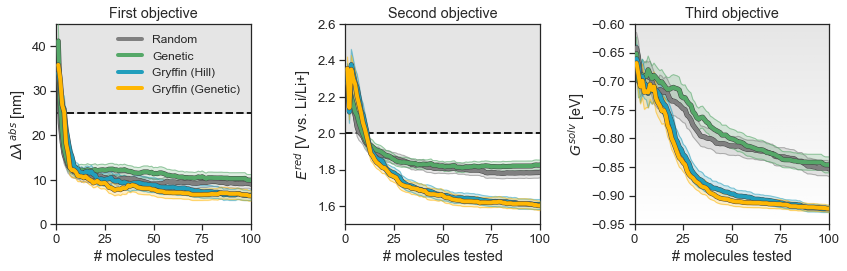

In [9]:
# MAIN TEXT PLOT

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharex=True)

axes[0].set_title('First objective')
axes[1].set_title('Second objective')
axes[2].set_title('Third objective')

for i in range(3):
    plot_trace_mean(data_random, obj_num=i, ax=axes[i], color='gray', label='Random')
    plot_trace_mean(data_deap, obj_num=i, ax=axes[i], color='g', label='Genetic')
    plot_trace_mean(data_adam_dynamic, obj_num=i, ax=axes[i], color='#219ebc', label='Gryffin (Hill)')
    plot_trace_mean(data_gene_dynamic, obj_num=i, ax=axes[i], color='#ffb703', label='Gryffin (Genetic)')
    
    
axes[0].set_xlim([0, 100])
axes[0].set_ylim([0, 45])
axes[0].fill_between(x=[0, 400], y1=chimera.tolerances[0], y2=45.0, alpha=0.2, color='gray')
axes[0].axhline(y=chimera.tolerances[0], linestyle='--', linewidth=2, color='k', zorder=2)

gradient_patch(ax=axes[2], xmin=0, xmax=100, ymin=-0.95, ymax=-0.6, fill_color='gray', alpha=0.2)

axes[0].set_ylabel(r'$\Delta \lambda^{abs}$ [nm]')

axes[1].fill_between(x=[0,400], y1=chimera.tolerances[1], y2=2.6, alpha=0.2, color='gray')
axes[1].axhline(y=chimera.tolerances[1], linestyle='--', linewidth=2, color='k', zorder=2)
axes[1].set_xlim([0, 100])
axes[1].set_ylim([1.5, 2.6])

axes[1].set_ylabel(r'$E^{red}$ [V vs. Li/Li+]')

axes[2].set_xlim([0, 100])
axes[2].set_ylabel(r'$G^{solv}$ [eV]')

for ax in axes:
    ax.set_xlabel('# molecules tested')

#axes[2].fill_between(x=[0,400], y1=chimera.tolerances[2], y2=60, alpha=0.2, color='gray')

axes[0].legend(loc='upper right', ncol=1, fontsize=12, frameon=False)

#axes[0].legend(frameon=False, ncol=1, fontsize=10, loc='upper right')
#axes[1].legend(frameon=False)

plt.tight_layout()
    
fig.savefig('batteries_merit_traces.pdf', bbox_inches="tight")
fig.savefig('batteries_merit_traces.png', dpi=300, bbox_inches="tight")

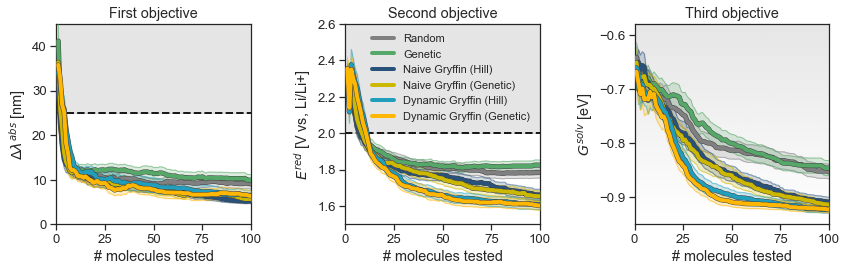

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

axes[0].set_title('First objective')
axes[1].set_title('Second objective')
axes[2].set_title('Third objective')

for i in range(3):
    plot_trace_mean(data_random, obj_num=i, ax=axes[i], color='gray', label='Random')
    plot_trace_mean(data_deap, obj_num=i, ax=axes[i], color='g', label='Genetic')
    plot_trace_mean(data_adam, obj_num=i, ax=axes[i], color='#29527a', label='Naive Gryffin (Hill)')
    plot_trace_mean(data_gene, obj_num=i, ax=axes[i], color='#ccb800', label='Naive Gryffin (Genetic)')
    plot_trace_mean(data_adam_dynamic, obj_num=i, ax=axes[i], color='#219ebc', label='Dynamic Gryffin (Hill)')
    plot_trace_mean(data_gene_dynamic, obj_num=i, ax=axes[i], color='#ffb703', label='Dynamic Gryffin (Genetic)')
    
    
axes[0].set_xlim([0, 100])
axes[0].set_ylim([0, 45])
axes[0].fill_between(x=[0, 400], y1=chimera.tolerances[0], y2=45.0, alpha=0.2, color='gray')
axes[0].axhline(chimera.tolerances[0], linestyle='--', linewidth=2, color='k', zorder=2)

gradient_patch(ax=axes[2], xmin=0, xmax=100, ymin=-0.95, ymax=-0.58, fill_color='gray', alpha=0.2)

axes[0].set_xlabel('# experiments')
axes[0].set_ylabel(r'$\Delta \lambda^{abs}$ [nm]')

axes[1].fill_between(x=[0,400], y1=chimera.tolerances[1], y2=2.6, alpha=0.2, color='gray')
axes[1].axhline(chimera.tolerances[1], linestyle='--', linewidth=2, color='k', zorder=2)
axes[1].set_xlim([0, 100])
axes[1].set_ylim([1.5, 2.6])

axes[1].set_xlabel('# experiments')
axes[1].set_ylabel(r'$E^{red}$ [V vs, Li/Li+]')

axes[2].set_xlim([0, 100])
axes[2].set_xlabel('# experiments')
axes[2].set_ylabel(r'$G^{solv}$ [eV]')

for ax in axes:
    ax.set_xlabel('# molecules tested')

axes[1].legend(loc='upper right', ncol=1, fontsize=11, frameon=False)

plt.tight_layout()
    
fig.savefig('batteries_merit_traces-si.pdf', bbox_inches="tight")
fig.savefig('batteries_merit_traces-si.png', dpi=300, bbox_inches="tight")